<a href="https://colab.research.google.com/github/gustavo-ifusp/edisc-analytics/blob/main/Analise_de_Dados_Indicadores_bolsa_PUB_junho_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analises de Dados (Junho/2021) - parte 1 - E-Disciplinas USP - Bolsa PUB 2020/2021**
Professor Orientador Dr. Ewout Ter Haar

Aluno Gustavo de Andrade

Este estudo é uma continuação ao projeto do Programa Unificado de Bolsa da Universidade de São Paulo de apoio pedagógico na plataforma moodle E-Disciplinas USP. 

Buscarei indicadores relacionados a métrica de total de matrículados.

Este estudo, assim como os dados apresentados, são te interesse particular, com fim educacional, sendo proíbido sua reprodução em todas hipóteses, permitido apenas a visualização no próprio canal disponivel.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#**Aqui efetuarei a leitura dos dataframes para comparação:**<br>
São arquivos com 1 linha por "módulo" (= recurso ou atividade no Moodle) e a informação mais importante nas colunas é o número de "views" (cliques), quantos alunos eram inscritos neste ambiente e "usuários únicos" que clicaram neste módulo. Tem também uma coluna derivada fracstudents que é a fração dos alunos que clicaram pelo menos uma vez no módulo.

  * quantos cliques (por aluno) fizeram (agregando tudo)
  * quantos cliques por módulo
  * quantos cliques em por exemplo "fórum" ou "tarefa" (=assign)

In [ ]:
url1 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/mv-2020-FD.csv"
base_FD = pd.read_csv(url1)
base_FD.sample(3)

,course,name,cmid,views,uniqusers,vpu,students,teachers,vps,fracstudents
11725,338,resource,3240759,1.0,1.0,1.0000,231,5,0.004329,0.004329
4026,106,resource,3080492,282.0,96.0,2.9375,115,2,2.452174,0.834783
8182,232,resource,3171296,4.0,4.0,1.0000,17,2,0.235294,0.235294


In [ ]:
url2 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/mv-2020-FE.csv"
base_FE = pd.read_csv(url2)
base_FE.sample(3)

,course,name,cmid,views,uniqusers,vpu,students,teachers,vps,fracstudents
1716,48,resource,3178202,13.0,10.0,1.300000,26,1,0.500000,0.384615
412,7,forum,2762675,233.0,18.0,12.944444,17,5,13.705882,1.058824
468,8,resource,2766513,71.0,36.0,1.972222,56,1,1.267857,0.642857


In [ ]:
url3 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/mv-2020-FEA.csv"
base_FEA = pd.read_csv(url3)
base_FEA.sample(3)

,course,name,cmid,views,uniqusers,vpu,students,teachers,vps,fracstudents
9222,168,resource,2916544,96.0,35.0,2.742857,44,1,2.181818,0.795455
24069,455,label,3211446,0.0,0.0,0.000000,128,2,0.000000,0.000000
11617,223,url,2900231,36.0,9.0,4.000000,15,2,2.400000,0.600000


In [ ]:
url4 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/mv-2020-FFLCH.csv"
base_FFLCH = pd.read_csv(url4)
base_FFLCH.sample(3)

,course,name,cmid,views,uniqusers,vpu,students,teachers,vps,fracstudents
2815,58,forum,2815776,265.0,35.0,7.571429,38,3,6.973684,0.921053
24285,605,forum,2991144,40.0,19.0,2.105263,45,2,0.888889,0.422222
20332,475,resource,3146435,8.0,6.0,1.333333,16,1,0.500000,0.375000


In [ ]:
url5 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/mv-2020-FMRP.csv"
base_FMRP = pd.read_csv(url5)
base_FMRP.sample(3)

,course,name,cmid,views,uniqusers,vpu,students,teachers,vps,fracstudents
27575,563,dialogue,3021928,0.0,0.0,0.00,6,1,0.000000,0.000000
15571,255,resource,3174398,6.0,5.0,1.20,19,2,0.315789,0.263158
20057,362,resource,2919349,59.0,25.0,2.36,28,6,2.107143,0.892857


In [ ]:
url6 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/mv-2020-IF.csv"
base_IF = pd.read_csv(url6)
base_IF.sample(3)

,course,name,cmid,views,uniqusers,vpu,students,teachers,vps,fracstudents
4249,80,quiz,3269904,37.0,1.0,37.000,84,2,0.440476,0.011905
7231,128,quiz,2763957,0.0,0.0,0.000,84,20,0.000000,0.000000
5675,97,resource,3269604,34.0,16.0,2.125,57,2,0.596491,0.280702


In [ ]:
url7 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/matrcurso.csv"
matrcurso = pd.read_csv(url7)
matrcurso['sglund'] = matrcurso['sglund'].astype('object')
matrcurso.rename(columns={'sglund':'unidade'}, inplace = True)
matrcurso.sample(5)

,ano,sem,codclg,codcur,codhab,staalu,codund,unidade,nomcur,nomhab,matr
12696,2017,1,45,45031,1,A,45,IME,Matemática Bacharelado,Matemática Bacharelado,1
4587,2016,1,8,8051,3504,M,8,FFLCH,Letras,Bacharelado - Habilitação: Português e Japonês,72
11556,2014,1,42,42080,Sem cadastro,T,42,ICB,Bacharelado em Ciências Biomédicas,NaN,7
5349,2017,2,8,8051,2902,A,8,FFLCH,Letras,Bacharelado - Habilitação: Português e Italiano,4
16099,2018,2,75,75014,200,T,75,IQSC,Química,Bacharelado em Química - Habilitação: Fundamental,3


In [ ]:
base_IF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7535 entries, 0 to 7534
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   course        7535 non-null   int64  
 1   name          7535 non-null   object 
 2   cmid          7535 non-null   int64  
 3   views         7535 non-null   float64
 4   uniqusers     7535 non-null   float64
 5   vpu           7535 non-null   float64
 6   students      7535 non-null   int64  
 7   teachers      7535 non-null   int64  
 8   vps           7534 non-null   float64
 9   fracstudents  7534 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 588.8+ KB


In [ ]:
soma_views_FD = base_FD['views'].sum()
soma_views_FE = base_FE['views'].sum()
soma_views_FEA = base_FEA['views'].sum()
soma_views_FFLCH = base_FFLCH['views'].sum()
soma_views_FMRP = base_FMRP['views'].sum()
soma_views_IF = base_IF['views'].sum()
print("A soma do views do IF: ",soma_views_IF)

A soma do views do IF:  2822222.0


In [ ]:
NM = matrcurso.groupby(['unidade','ano'])['matr'].sum() #corrigido!
print("Tabela coma soma de matriculados por unidades e ano")
Soma_matriculados = pd.DataFrame(NM)
Soma_matriculados

Tabela coma soma de matriculados por unidades


matr
unidade ano       
CENA    2012     9
        2013     9
        2014    13
        2015     8
        2016     7
...            ...
RUSP    2016   932
        2017   664
        2018   450
        2019   328
        2020   136

[448 rows x 1 columns]

In [ ]:
alunos_FDD = Soma_matriculados.query('unidade == "FD" and ano == "2020"')
alunos_FDD  = alunos_FDD['matr']
alunos_FDD

unidade  ano 
FD       2020    2542
Name: matr, dtype: int64

In [ ]:
alunos_FD = Soma_matriculados.query('unidade == "FD" and ano == "2020"')['matr']
alunos_FE = Soma_matriculados.query('unidade == "FE" and ano == "2020"')['matr']
alunos_FEA = Soma_matriculados.query('unidade == "FEA" and ano == "2020"')['matr']
alunos_FFLCH = Soma_matriculados.query('unidade == "FFLCH" and ano == "2020"')['matr']
alunos_FMRP = Soma_matriculados.query('unidade == "FMRP" and ano == "2020"')['matr']
alunos_IF = Soma_matriculados.query('unidade == "IF" and ano == "2020"')['matr']
print(alunos_FD, alunos_FE, alunos_FEA, alunos_FFLCH, alunos_FMRP, alunos_IF)

unidade  ano 
FD       2020    2542
Name: matr, dtype: int64 unidade  ano 
FE       2020    1186
Name: matr, dtype: int64 unidade  ano 
FEA      2020    3166
Name: matr, dtype: int64 unidade  ano 
FFLCH    2020    9927
Name: matr, dtype: int64 unidade  ano 
FMRP     2020    1435
Name: matr, dtype: int64 unidade  ano 
IF       2020    1437
Name: matr, dtype: int64


#**Cliques por alunos**

In [ ]:
clicks_por_alunos_FD = soma_views_FD/alunos_FD
clicks_por_alunos_FE = soma_views_FE/alunos_FE
clicks_por_alunos_FEA = soma_views_FEA/alunos_FEA
clicks_por_alunos_FFLCH = soma_views_FFLCH/alunos_FFLCH
clicks_por_alunos_FMRP = soma_views_FMRP/alunos_FMRP
clicks_por_alunos_IF = soma_views_IF/alunos_IF
print(clicks_por_alunos_FD, clicks_por_alunos_FE, clicks_por_alunos_FEA, clicks_por_alunos_FFLCH, clicks_por_alunos_FMRP, clicks_por_alunos_IF)

unidade  ano 
FD       2020    1133.196696
Name: matr, dtype: float64 unidade  ano 
FE       2020    387.440135
Name: matr, dtype: float64 unidade  ano 
FEA      2020    1607.000316
Name: matr, dtype: float64 unidade  ano 
FFLCH    2020    379.313589
Name: matr, dtype: float64 unidade  ano 
FMRP     2020    2869.519861
Name: matr, dtype: float64 unidade  ano 
IF       2020    1963.967989
Name: matr, dtype: float64


In [ ]:
clicks_por_alunos_teste= pd.concat([clicks_por_alunos_FD, clicks_por_alunos_FE, clicks_por_alunos_FEA, clicks_por_alunos_FFLCH, clicks_por_alunos_FMRP, clicks_por_alunos_IF],axis = 0)
clicks_por_alunos_teste
clicks_por_alunos = pd.DataFrame(clicks_por_alunos_teste)
clicks_por_alunos.rename(columns={'matr':'Clicks/Matr'}, inplace = True)
clicks_por_alunos

,,Clicks/Matr
unidade,ano,
FD,2020,1133.196696
FE,2020,387.440135
FEA,2020,1607.000316
FFLCH,2020,379.313589
FMRP,2020,2869.519861
IF,2020,1963.967989


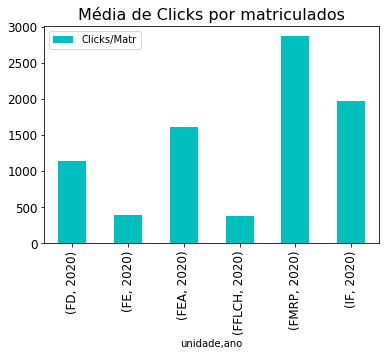

In [ ]:
clicks_por_alunos.plot(kind='bar', color="c")
plt.title('Média de Clicks por matriculados', fontsize=16)
plt.tick_params(labelsize=12)
plt.show()

#**Cliques por modulos**

In [ ]:
soma_mod_FD = base_FD.count()
soma_mod_FE = base_FE.count()
soma_mod_FEA = base_FEA.count()
soma_mod_FFLCH = base_FFLCH.count()
soma_mod_FMRP = base_FMRP.count()
soma_mod_IF = base_IF.count()
print(soma_mod_FD, soma_mod_FE, soma_mod_FEA, soma_mod_FFLCH, soma_mod_FMRP, soma_mod_IF )

course          17438
name            17438
cmid            17438
views           17438
uniqusers       17438
vpu             17438
students        17438
teachers        17438
vps             17403
fracstudents    17403
dtype: int64 course          4852
name            4852
cmid            4852
views           4852
uniqusers       4852
vpu             4852
students        4852
teachers        4852
vps             4849
fracstudents    4849
dtype: int64 course          26454
name            26454
cmid            26454
views           26454
uniqusers       26454
vpu             26454
students        26454
teachers        26454
vps             26444
fracstudents    26444
dtype: int64 course          33023
name            33023
cmid            33023
views           33023
uniqusers       33023
vpu             33023
students        33023
teachers        33023
vps             32875
fracstudents    32875
dtype: int64 course          31015
name            31015
cmid            31015
views       

In [ ]:
base_FD.shape

(17438, 10)

In [ ]:
soma_mod_FD = base_FD['name'].count() #verificado no info, leitura correta!
soma_mod_FE = base_FE['name'].count()
soma_mod_FEA = base_FEA['name'].count()
soma_mod_FFLCH = base_FFLCH['name'].count()
soma_mod_FMRP = base_FMRP['name'].count()
soma_mod_IF = base_IF['name'].count()
print(soma_mod_FD, soma_mod_FE, soma_mod_FEA, soma_mod_FFLCH, soma_mod_FMRP, soma_mod_IF )

17438 4852 26454 33023 31015 7535


In [ ]:
clicks_por_mod_FD = soma_views_FD/soma_mod_FD
clicks_por_mod_FE = soma_views_FE/soma_mod_FE
clicks_por_mod_FEA = soma_views_FEA/soma_mod_FEA
clicks_por_mod_FFLCH = soma_views_FFLCH/soma_mod_FFLCH
clicks_por_mod_FMRP = soma_views_FMRP/soma_mod_FMRP
clicks_por_mod_IF = soma_views_IF/soma_mod_IF
print(clicks_por_mod_FD, clicks_por_mod_FE, clicks_por_mod_FEA, clicks_por_mod_FFLCH, clicks_por_mod_FMRP, clicks_por_mod_IF)

165.19015942195205 94.7040395713108 192.3249036062599 114.02495230596857 132.76675802031275 374.54837425348376


In [ ]:
l_clicks_mod = [clicks_por_mod_FD, clicks_por_mod_FE, clicks_por_mod_FEA, clicks_por_mod_FFLCH, clicks_por_mod_FMRP, clicks_por_mod_IF]
list_clicks_mod =  {'Clicks/Modulo': l_clicks_mod}
clicks_por_mod_result = pd.DataFrame(data=list_clicks_mod)
clicks_por_mod_result

,Clicks/Modulo
0,165.190159
1,94.704040
2,192.324904
3,114.024952
4,132.766758
5,374.548374


In [ ]:
clicks_por_mod = clicks_por_alunos
clicks_por_mod.rename(columns={'Clicks/Matr':'Clicks/Modulo'}, inplace = True)
clicks_por_mod['Clicks/Modulo'] = clicks_por_mod_result['Clicks/Modulo'].values
clicks_por_mod

,,Clicks/Modulo
unidade,ano,
FD,2020,165.190159
FE,2020,94.704040
FEA,2020,192.324904
FFLCH,2020,114.024952
FMRP,2020,132.766758
IF,2020,374.548374


In [ ]:
clicks_por_mod.set_index

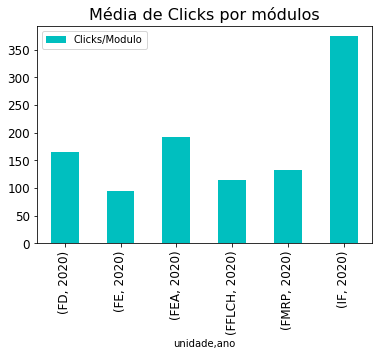

In [ ]:
clicks_por_mod.plot(kind='bar', color="c")
plt.title('Média de Clicks por módulos', fontsize=16)
plt.tick_params(labelsize=12)
plt.show()

A interpretação destes gráficos são corretas, em que podemos ver uma média de clicks para cada aluno de alguma disciplina do instituto correspondente, porém, alunos do instituto A que possui alguma matéria do instituto B soma no total de clicks do instituto A e não soma no total de matriculado do instituto A, dando um certo problema logico ao não subitrair esses alunos de "fora" do instituto no numero total de clicks. Com isso, a solução proposta é trabalhar com o numero de docentes e não de matriculados, calculando o numero de clicks total dos ambientes de cada instituto por docente, uma média que mostrará essa densidade de clicks e a comparação entre os institutos será mais precisa. Quanto ao clicks por modulo, esta correto. 